<a href="https://colab.research.google.com/github/Pavankumar5899/Housing-Price-Prediction/blob/main/Housing%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error (MSE): 1754318687330.6675
Mean Absolute Error (MAE): 970043.4039201641
R-squared (R²): 0.6529242642153177
Mean Absolute Percentage Error (MAPE): 21.03552331079958
R² for Ridge Regression: 0.652103720086862
R² for Lasso Regression: 0.6529242024078725


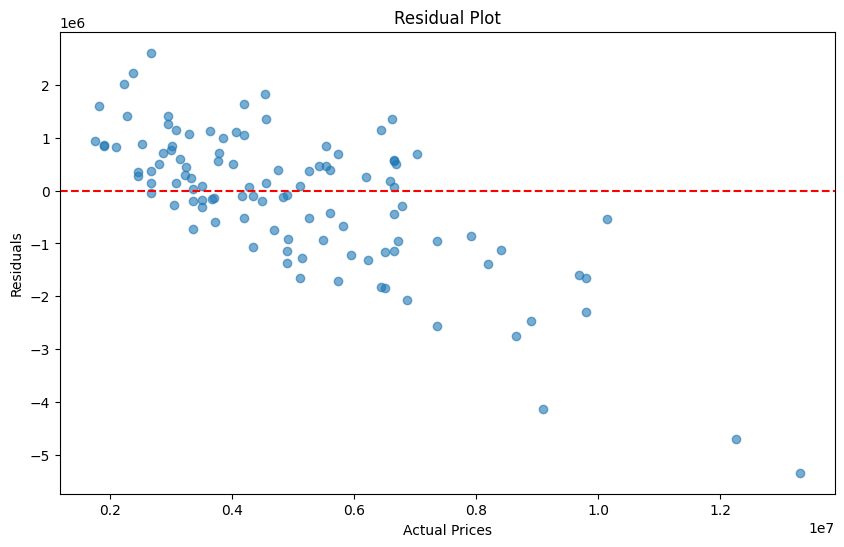

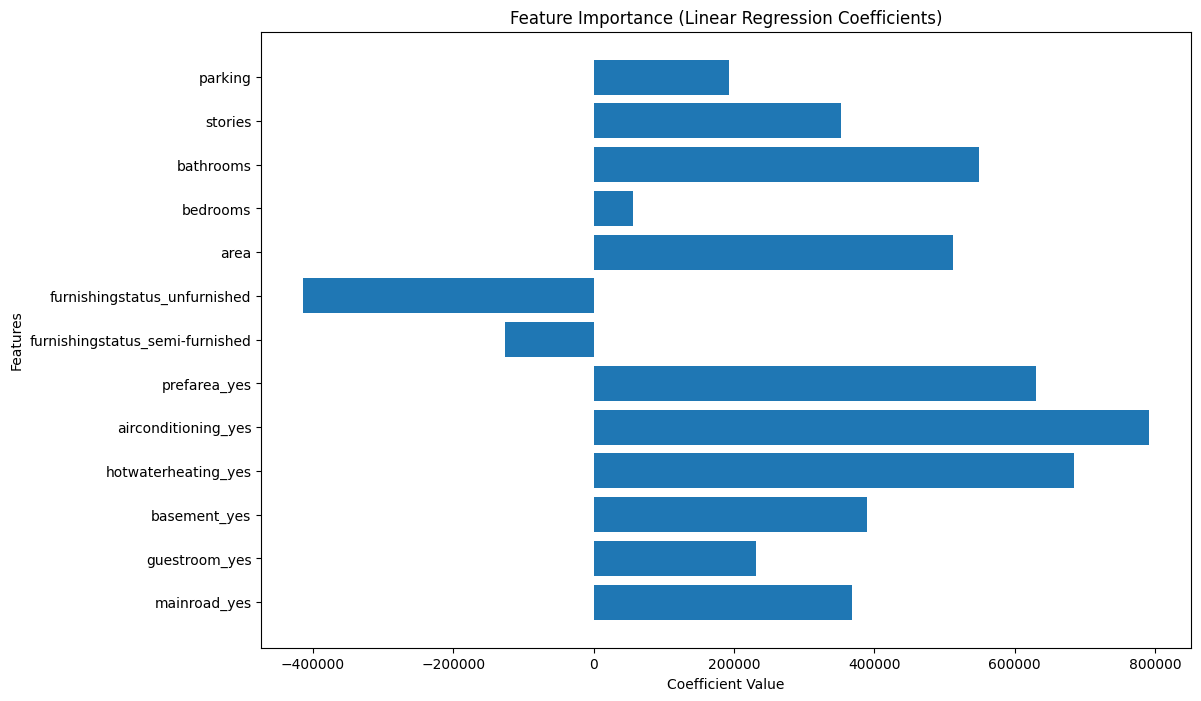

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
file_path = '/mnt/data/Housing.csv'
data = pd.read_csv("/content/Housing.csv")

# Handle missing values (if any)
data = data.dropna()  # Dropping rows with missing values for simplicity

# Identify categorical and numerical columns
categorical_cols = [
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditioning', 'prefarea', 'furnishingstatus'
]
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Separate features and target variable
X = data[categorical_cols + numerical_cols]
y = data['price']

# Preprocess categorical variables and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

# Transform the features
X_transformed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

# Additional metric: Mean Absolute Percentage Error (MAPE)
mape = (np.abs(y_test - y_pred) / y_test).mean() * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
print("R² for Ridge Regression:", ridge_r2)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)
print("R² for Lasso Regression:", lasso_r2)

# Visualizations
# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred - y_test, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.show()

# Feature Importance (Coefficients)
feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_cols).tolist()
feature_names += numerical_cols
coefficients = model.coef_
plt.figure(figsize=(12, 8))
plt.barh(feature_names, coefficients)
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()
